# STD & me

Analysis of 2014 data from the CDC on the prevalence of STD's in U.S. counties. 

In [164]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [165]:
# Always display all the columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 200) 

# Plain Seaborn figures with matplotlib color codes mapped to the default seaborn palette 
sns.set(style="white", color_codes=True)

## CDC data on Chlamydia

In [166]:
df = pd.read_csv("../data/cdc/chlamydia.csv")

In [167]:
df.shape

(3228, 12)

In [168]:
df.columns

Index(['Disease', 'Area', 'State Abbreviation', 'FIPS', 'Year', 'Race', 'Sex', 'Age group', 'Transmission Category', 'Population', 'Cases', 'Rate'], dtype='object')

In [169]:
df.dtypes

Disease                  object
Area                     object
State Abbreviation       object
FIPS                      int64
Year                      int64
Race                     object
Sex                      object
Age group                object
Transmission Category    object
Population               object
Cases                    object
Rate                     object
dtype: object

In [170]:
df_test = df.convert_objects(convert_numeric=True)
df_test.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [171]:
df_test.head()

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,NaN,72,124.4


In [172]:
df['Population'] = df['Population'].str.replace(',','')
df['Cases'] = df['Cases'].str.replace(',','')

In [173]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


Disease                   object
Area                      object
State Abbreviation        object
FIPS                       int64
Year                       int64
Race                      object
Sex                       object
Age group                 object
Transmission Category     object
Population               float64
Cases                    float64
Rate                     float64
dtype: object

In [174]:
df.head(77)

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
0,Chlamydia,Autauga County,AL,1001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,55246,220,398.2
1,Chlamydia,Baldwin County,AL,1003,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,195540,667,341.1
2,Chlamydia,Barbour County,AL,1005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,27076,166,613.1
3,Chlamydia,Bibb County,AL,1007,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22512,100,444.2
4,Chlamydia,Blount County,AL,1009,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,57872,72,124.4
5,Chlamydia,Bullock County,AL,1011,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,10639,100,939.9
6,Chlamydia,Butler County,AL,1013,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,20265,163,804.3
7,Chlamydia,Calhoun County,AL,1015,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,116736,845,723.9
8,Chlamydia,Chambers County,AL,1017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34162,282,825.5
9,Chlamydia,Cherokee County,AL,1019,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,26203,96,366.4


In [175]:
df['Population'].describe()

count        3220.000000
mean        99360.995963
std        318648.364529
min            90.000000
25%         11267.750000
50%         26165.500000
75%         66834.250000
max      10017068.000000
Name: Population, dtype: float64

In [176]:
df['Population'].idxmax()

207

In [177]:
df.loc[207]

Disease                                    Chlamydia
Area                              Los Angeles County
State Abbreviation                                CA
FIPS                                            6037
Year                                            2014
Race                           All races/ethnicities
Sex                                       Both sexes
Age group                             All age groups
Transmission Category    All transmission categories
Population                               1.00171e+07
Cases                                          54881
Rate                                           547.9
Name: 207, dtype: object

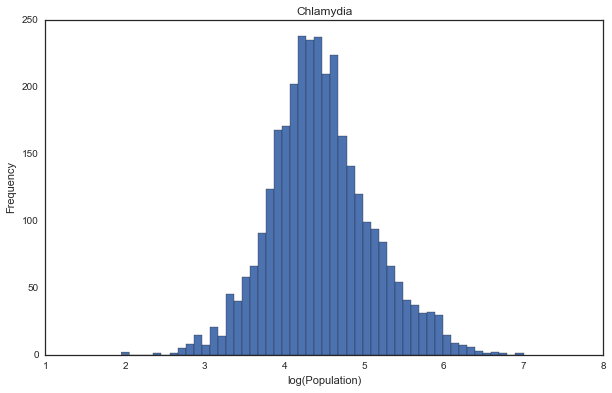

In [178]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Population'])
ax = data.plot.hist(50)
ax.set_xlabel("log(Population)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_population.png', bbox_inches='tight', dpi=150)

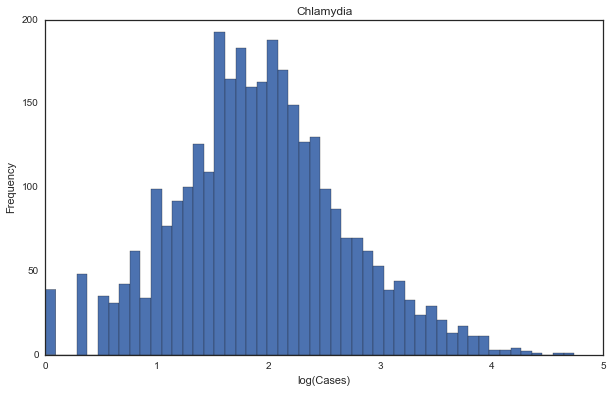

In [179]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df['Cases']+1)
ax = data.plot.hist(50)
ax.set_xlabel("log(Cases)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_cases.png', bbox_inches='tight', dpi=150)

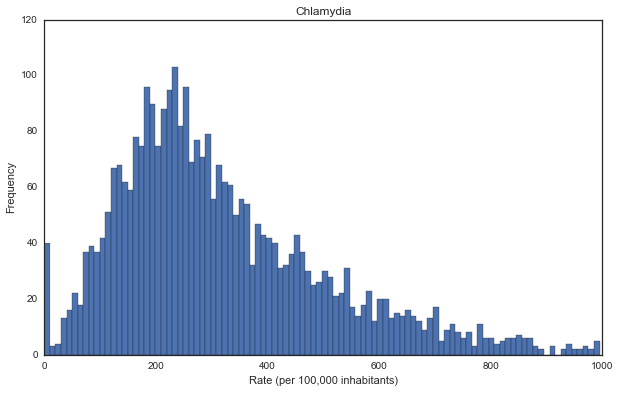

In [180]:
fig = plt.figure(figsize=(10, 6))
ax = df['Rate'].plot.hist(100)
ax.set_xlabel("Rate (per 100,000 inhabitants)")
ax.set_title("Chlamydia")
plt.savefig('../graphics/county_rate.png', bbox_inches='tight', dpi=150)

In [181]:
outliers = df[df['Rate']<50]

In [182]:
outliers

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
88,Chlamydia,Prince of Wales - Outer Ketchikan,AK,2201,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,5786,0,0.0
96,Chlamydia,Wrangell-Petersburg Census Area,AK,2280,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,6174,0,0.0
256,Chlamydia,Cheyenne County,CO,8017,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1890,0,0.0
274,Chlamydia,Hinsdale County,CO,8053,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,813,0,0.0
278,Chlamydia,Kiowa County,CO,8061,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,1423,0,0.0
322,Chlamydia,District Of Columbia,DC,11001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,646449,2,0.3
551,Chlamydia,Kalawao County,HI,15005,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,90,0,0.0
565,Chlamydia,Butte County,ID,16023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2642,1,37.9
586,Chlamydia,Madison County,ID,16065,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,37450,15,40.1
902,Chlamydia,Cheyenne County,KS,20023,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,2694,1,37.1


In [183]:
not_exclude_list = df["Cases"]<0
exclude_list = [not i for i in not_exclude_list]
df_sig = df[exclude_list].copy()

In [184]:
df = df_sig.copy()

People in D.C. don't have Chlamydia. Or so it seems.

I will have to remove the entries with very low numbers of Chlamydia cases.

In [185]:
df["Rate"].sort_values()

2040     0
2016     0
1623     0
1763     0
2385     0
278      0
1550     0
2036     0
1714     0
274      0
2657     0
2656     0
1694     0
980      0
551      0
96       0
256      0
1702     0
88       0
1664     0
2612     0
1635     0
941      0
1432     0
1739     0
2676     0
1659     0
1661     0
1628     0
3136     0
        ..
1995   NaN
2023   NaN
2032   NaN
2035   NaN
2297   NaN
2335   NaN
2349   NaN
2352   NaN
2356   NaN
2372   NaN
2375   NaN
2379   NaN
2384   NaN
2420   NaN
2424   NaN
2434   NaN
2539   NaN
2919   NaN
2926   NaN
2927   NaN
2930   NaN
2933   NaN
2942   NaN
2944   NaN
2946   NaN
2947   NaN
2948   NaN
3090   NaN
3146   NaN
3148   NaN
Name: Rate, dtype: float64

In [186]:
len(df['Area'].unique())

1962

In [187]:
df.shape

(3228, 12)

In [188]:
df.sort_values(by='Area')

,Disease,Area,State Abbreviation,FIPS,Year,Race,Sex,Age group,Transmission Category,Population,Cases,Rate
2319,Chlamydia,Abbeville County,SC,45001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25007,117,467.9
1116,Chlamydia,Acadia Parish,LA,22001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,62204,285,458.2
2823,Chlamydia,Accomack County,VA,51001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,33148,262,790.4
554,Chlamydia,Ada County,ID,16001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,416464,1529,367.1
996,Chlamydia,Adair County,KY,21001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,18732,46,245.6
1486,Chlamydia,Adair County,MO,29001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,25572,70,273.7
792,Chlamydia,Adair County,IA,19001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,7472,7,93.7
2134,Chlamydia,Adair County,OK,40001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,22194,128,576.7
1657,Chlamydia,Adams County,NE,31001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,31610,87,275.2
700,Chlamydia,Adams County,IN,18001,2014,All races/ethnicities,Both sexes,All age groups,All transmission categories,34614,43,124.2


In [189]:
df['Area'].value_counts()

Washington County       30
Jefferson County        25
Franklin County         24
Jackson County          23
Lincoln County          23
Madison County          19
Montgomery County       18
Clay County             18
Marion County           17
Monroe County           17
Union County            17
Wayne County            16
Greene County           14
Grant County            14
Warren County           14
Carroll County          13
Marshall County         12
Lake County             12
Johnson County          12
Douglas County          12
Lee County              12
Polk County             12
Clark County            12
Adams County            12
Crawford County         11
Calhoun County          11
Fayette County          11
Morgan County           11
Lawrence County         11
Scott County            11
                        ..
Cambria County           1
Fort Bend County         1
Lenoir County            1
Boulder County           1
Collingsworth County     1
Miami-Dade County        1
O

In [190]:
df.isnull().values.any()

True

In [191]:
null_list = df["Population"].isnull()
not_null_list = [not i for i in null_list]
df_clean = df[not_null_list].copy()

In [192]:
null_list = df_clean["Rate"].isnull()
not_null_list = [not i for i in null_list]
df_completely_clean = df_clean[not_null_list].copy()

In [193]:
df_completely_clean["Rate"].isnull().values.any()

False

## Get ZIP codes and FIPS codes for counties

We will need a mapping function for ZIP codes and for FIPS codes. ZIP codes are used by USPS and are generally known by the users, whereas governmental studies and CDC data usually use FIPS codes for regions. 

In [194]:
df_fipszip= pd.read_csv("../data/COUNTY_ZIP_122014.csv", usecols={0,1})

In [195]:
df_fipszip.shape

(51280, 2)

In [196]:
df_fipszip.head()

,COUNTY,ZIP
0,1001,36051
1,1001,36066
2,1001,36703
3,1001,36068
4,1001,36749


In [197]:
df_zipfips= pd.read_csv("../data/ZIP_COUNTY_122014.csv", usecols={0,1})

In [198]:
df_zipfips.shape

(51280, 2)

In [199]:
df_zipfips.head()

,ZIP,COUNTY
0,501,36103
1,601,72001
2,602,72003
3,603,72005
4,604,72005


In [200]:
df_zipfips.dtypes

ZIP       int64
COUNTY    int64
dtype: object

In [201]:
zip2fips = dict(zip(df_zipfips["ZIP"], df_zipfips["COUNTY"]))

In [202]:
zip2fips[65536]

29105

In [203]:
fips2zip = {}

In [204]:
for fips in np.arange(len(df_fipszip.COUNTY)):
    if df_fipszip.COUNTY[fips] in fips2zip:
        fips2zip[df_fipszip.COUNTY[fips]].append(df_fipszip.ZIP[fips])
    else:
        fips2zip[df_fipszip.COUNTY[fips]] = []
        fips2zip[df_fipszip.COUNTY[fips]].append(df_fipszip.ZIP[fips])

In [205]:
fips2zip[1001]

[36051,
 36066,
 36703,
 36068,
 36749,
 36006,
 36067,
 36022,
 36091,
 36758,
 36003,
 36008]

In [206]:
df_fipszip.COUNTY[1]

1001

In [207]:
fips2zip[zip2fips[754]]

[754]

In [208]:
df_fipszip['COUNTY'].value_counts()

6037     498
48201    229
17031    225
11001    219
4013     193
6073     178
6059     145
42003    144
48113    140
36061    135
12086    122
6071     122
53033    119
32003    114
36103    111
25017    107
9003     107
6085     106
48439    104
48029    104
6065     104
6019     103
25027    102
42129     94
42091     92
48453     90
26125     90
36029     90
1073      88
12057     87
        ... 
72129      1
72019      1
51515      1
31007      1
48261      1
31117      1
72065      1
72121      1
72125      1
72093      1
51720      1
72027      1
35028      1
48431      1
72045      1
48155      1
51530      1
48271      1
51580      1
48413      1
72051      1
72095      1
72143      1
48137      1
72111      1
48301      1
72079      1
72059      1
72047      1
72043      1
Name: COUNTY, dtype: int64

In [209]:
df_fipszip[df_fipszip["COUNTY"] == 72129]

,COUNTY,ZIP
51244,72129,754


## Census data for counties

In [210]:
df_census = pd.read_csv("../data/census/DEC10.csv", header=0, skiprows={1})
df_census_labels = pd.read_csv("../data/census/DEC10.csv", header=0, nrows=1)

In [211]:
df_census.shape, df_census_labels.shape

((3143, 375), (1, 375))

In [212]:
df_census_labels

,GEO.id,GEO.id2,GEO.display-label,HD01_S001,HD02_S001,HD01_S002,HD02_S002,HD01_S003,HD02_S003,HD01_S004,HD02_S004,HD01_S005,HD02_S005,HD01_S006,HD02_S006,HD01_S007,HD02_S007,HD01_S008,HD02_S008,HD01_S009,HD02_S009,HD01_S010,HD02_S010,HD01_S011,HD02_S011,HD01_S012,HD02_S012,HD01_S013,HD02_S013,HD01_S014,HD02_S014,HD01_S015,HD02_S015,HD01_S016,HD02_S016,HD01_S017,HD02_S017,HD01_S018,HD02_S018,HD01_S019,HD02_S019,HD01_S020,HD02_S020,HD01_S021,HD02_S021,HD01_S022,HD02_S022,HD01_S023,HD02_S023,HD01_S024,HD02_S024,HD01_S025,HD02_S025,HD01_S026,HD02_S026,HD01_S027,HD02_S027,HD01_S028,HD02_S028,HD01_S029,HD02_S029,HD01_S030,HD02_S030,HD01_S031,HD02_S031,HD01_S032,HD02_S032,HD01_S033,HD02_S033,HD01_S034,HD02_S034,HD01_S035,HD02_S035,HD01_S036,HD02_S036,HD01_S037,HD02_S037,HD01_S038,HD02_S038,HD01_S039,HD02_S039,HD01_S040,HD02_S040,HD01_S041,HD02_S041,HD01_S042,HD02_S042,HD01_S043,HD02_S043,HD01_S044,HD02_S044,HD01_S045,HD02_S045,HD01_S046,HD02_S046,HD01_S047,HD02_S047,HD01_S048,HD02_S048,HD01_S049,...,HD01_S137,HD02_S137,HD01_S138,HD02_S138,HD01_S139,HD02_S139,HD01_S140,HD02_S140,HD01_S141,HD02_S141,HD01_S142,HD02_S142,HD01_S143,HD02_S143,HD01_S144,HD02_S144,HD01_S145,HD02_S145,HD01_S146,HD02_S146,HD01_S147,HD02_S147,HD01_S148,HD02_S148,HD01_S149,HD02_S149,HD01_S150,HD02_S150,HD01_S151,HD02_S151,HD01_S152,HD02_S152,HD01_S153,HD02_S153,HD01_S154,HD02_S154,HD01_S155,HD02_S155,HD01_S156,HD02_S156,HD01_S157,HD02_S157,HD01_S158,HD02_S158,HD01_S159,HD02_S159,HD01_S160,HD02_S160,HD01_S161,HD02_S161,HD01_S162,HD02_S162,HD01_S163,HD02_S163,HD01_S164,HD02_S164,HD01_S165,HD02_S165,HD01_S166,HD02_S166,HD01_S167,HD02_S167,HD01_S168,HD02_S168,HD01_S169,HD02_S169,HD01_S170,HD02_S170,HD01_S171,HD02_S171,HD01_S172,HD02_S172,HD01_S173,HD02_S173,HD01_S174,HD02_S174,HD01_S175,HD02_S175,HD01_S176,HD02_S176,HD01_S177,HD02_S177,HD01_S178,HD02_S178,HD01_S179,HD02_S179,HD01_S180,HD02_S180,HD01_S181,HD02_S181,HD01_S182,HD02_S182,HD01_S183,HD02_S183,HD01_S184,HD02_S184,HD01_S185,HD02_S185,HD01_S186,HD02_S186
0,Id,Id2,Geography,Number; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Number; SEX AND AGE - Total population - Under...,Percent; SEX AND AGE - Total population - Unde...,Number; SEX AND AGE - Total population - 5 to ...,Percent; SEX AND AGE - Total population - 5 to...,Number; SEX AND AGE - Total population - 10 to...,Percent; SEX AND AGE - Total population - 10 t...,Number; SEX AND AGE - Total population - 15 to...,Percent; SEX AND AGE - Total population - 15 t...,Number; SEX AND AGE - Total population - 20 to...,Percent; SEX AND AGE - Total population - 20 t...,Number; SEX AND AGE - Total population - 25 to...,Percent; SEX AND AGE - Total population - 25 t...,Number; SEX AND AGE - Total population - 30 to...,Percent; SEX AND AGE - Total population - 30 t...,Number; SEX AND AGE - Total population - 35 to...,Percent; SEX AND AGE - Total population - 35 t...,Number; SEX AND AGE - Total population - 40 to...,Percent; SEX AND AGE - Total population - 40 t...,Number; SEX AND AGE - Total population - 45 to...,Percent; SEX AND AGE - Total population - 45 t...,Number; SEX AND AGE - Total population - 50 to...,Percent; SEX AND AGE - Total population - 50 t...,Number; SEX AND AGE - Total population - 55 to...,Percent; SEX AND AGE - Total population - 55 t...,Number; SEX AND AGE - Total population - 60 to...,Percent; SEX AND AGE - Total population - 60 t...,Number; SEX AND AGE - Total population - 65 to...,Percent; SEX AND AGE - Total population - 65 t...,Number; SEX AND AGE - Total population - 70 to...,Percent; SEX AND AGE - Total population - 70 t...,Number; SEX AND AGE - Total population - 75 to...,Percent; SEX AND AGE - Total population - 75 t...,Number; SEX AND AGE - Total population - 80 to...,Percent; SEX AND AGE - Total population - 80 t...,Number; SEX AND AGE - Total population - 85 ye...,Percent; SEX AND AGE - Total population - 85 y...,Number; SEX AND AGE - Total population - Media...,Percent; SEX AND AGE - Total population - Me

In [213]:
df_census.head()

,GEO.id,GEO.id2,GEO.display-label,HD01_S001,HD02_S001,HD01_S002,HD02_S002,HD01_S003,HD02_S003,HD01_S004,HD02_S004,HD01_S005,HD02_S005,HD01_S006,HD02_S006,HD01_S007,HD02_S007,HD01_S008,HD02_S008,HD01_S009,HD02_S009,HD01_S010,HD02_S010,HD01_S011,HD02_S011,HD01_S012,HD02_S012,HD01_S013,HD02_S013,HD01_S014,HD02_S014,HD01_S015,HD02_S015,HD01_S016,HD02_S016,HD01_S017,HD02_S017,HD01_S018,HD02_S018,HD01_S019,HD02_S019,HD01_S020,HD02_S020,HD01_S021,HD02_S021,HD01_S022,HD02_S022,HD01_S023,HD02_S023,HD01_S024,HD02_S024,HD01_S025,HD02_S025,HD01_S026,HD02_S026,HD01_S027,HD02_S027,HD01_S028,HD02_S028,HD01_S029,HD02_S029,HD01_S030,HD02_S030,HD01_S031,HD02_S031,HD01_S032,HD02_S032,HD01_S033,HD02_S033,HD01_S034,HD02_S034,HD01_S035,HD02_S035,HD01_S036,HD02_S036,HD01_S037,HD02_S037,HD01_S038,HD02_S038,HD01_S039,HD02_S039,HD01_S040,HD02_S040,HD01_S041,HD02_S041,HD01_S042,HD02_S042,HD01_S043,HD02_S043,HD01_S044,HD02_S044,HD01_S045,HD02_S045,HD01_S046,HD02_S046,HD01_S047,HD02_S047,HD01_S048,HD02_S048,HD01_S049,...,HD01_S137,HD02_S137,HD01_S138,HD02_S138,HD01_S139,HD02_S139,HD01_S140,HD02_S140,HD01_S141,HD02_S141,HD01_S142,HD02_S142,HD01_S143,HD02_S143,HD01_S144,HD02_S144,HD01_S145,HD02_S145,HD01_S146,HD02_S146,HD01_S147,HD02_S147,HD01_S148,HD02_S148,HD01_S149,HD02_S149,HD01_S150,HD02_S150,HD01_S151,HD02_S151,HD01_S152,HD02_S152,HD01_S153,HD02_S153,HD01_S154,HD02_S154,HD01_S155,HD02_S155,HD01_S156,HD02_S156,HD01_S157,HD02_S157,HD01_S158,HD02_S158,HD01_S159,HD02_S159,HD01_S160,HD02_S160,HD01_S161,HD02_S161,HD01_S162,HD02_S162,HD01_S163,HD02_S163,HD01_S164,HD02_S164,HD01_S165,HD02_S165,HD01_S166,HD02_S166,HD01_S167,HD02_S167,HD01_S168,HD02_S168,HD01_S169,HD02_S169,HD01_S170,HD02_S170,HD01_S171,HD02_S171,HD01_S172,HD02_S172,HD01_S173,HD02_S173,HD01_S174,HD02_S174,HD01_S175,HD02_S175,HD01_S176,HD02_S176,HD01_S177,HD02_S177,HD01_S178,HD02_S178,HD01_S179,HD02_S179,HD01_S180,HD02_S180,HD01_S181,HD02_S181,HD01_S182,HD02_S182,HD01_S183,HD02_S183,HD01_S184,HD02_S184,HD01_S185,HD02_S185,HD01_S186,HD02_S186
0,0500000US01001,1001,"Autauga County, Alabama",54571,100,3579,6.6,3991,7.3,4290,7.9,4290,7.9,3080,5.6,3157,5.8,3330,6.1,4157,7.6,4086,7.5,4332,7.9,3873,7.1,3083,5.6,2777,5.1,2277,4.2,1736,3.2,1251,2.3,731,1.3,551,1.0,37.0,( X ),41804,76.6,39958,73.2,37756,69.2,8222,15.1,6546,12.0,26569,48.7,1866,3.4,2001,3.7,2171,4.0,2213,4.1,1539,2.8,1543,2.8,1594,2.9,2004,3.7,1974,3.6,2174,4.0,1866,3.4,1524,2.8,1279,2.3,1014,1.9,807,1.5,546,1.0,295,0.5,159,0.3,35.9,( X ),20046,36.7,19114,35.0,17968,32.9,3606,...,1551,2.8,425,0.8,1859,3.4,167,0.3,75,0.1,882,1.6,455,0.8,362,0.7,194,0.4,168,0.3,93,0.2,62,0.1,31,0.1,20221,100,15064,74.5,7065,34.9,11367,56.2,5110,25.3,934,4.6,474,2.3,2763,13.7,1481,7.3,5157,25.5,4441,22.0,2012,10.0,417,2.1,2429,12.0,1187,5.9,7972,39.4,4733,23.4,2.68,( X ),3.13,( X ),22135,100,20221,91.4,1914,8.6,429,1.9,30,0.1,305,1.4,62,0.3,266,1.2,822,3.7,2.0,( X ),7.9,( X ),20221,100,15248,75.4,40942,( X ),2.69,( X ),4973,24.6,13174,( X ),2.65,( X )
1,0500000US01003,1003,"Baldwin County, Alabama",182265,100,11158,6.1,11599,6.4,11926,6.5,11600,6.4,9449,5.2,10247,5.6,10709,5.9,11558,6.3,11995,6.6,13431,7.4,13490,7.4,12523,6.9,12012,6.6,10174,5.6,7629,4.2,5598,3.1,3934,2.2,3233,1.8,41.1,( X ),145215,79.7,140367,77.0,134024,73.5,37780,20.7,30568,16.8,89196,48.9,5614,3.1,5832,3.2,6076,3.3,5930,3.3,4793,2.6,5183,2.8,5317,2.9,5725,3.1,5895,3.2,6622,3.6,6425,3.5,5943,3.3,5728,3.1,4895,2.7,3663,2.0,2644,1.5,1735,1.0,1176,0.6,40.1,( X ),70491,38.7,67970,37.3,64731,35.5,17540,...,4542,2.5,1356,0.7,7931,4.4,651,0.4,427,0.2,3686,2.0,2307,1.3,1744,1.0,1282,0.7,462,0.3,563,0.3,259,0.1,304,0.2,73180,100,51151,69.9,20472,28.0,39913,54.5,14559,19.9,3094,4.2,1558,2.1,8144,11.1,4355,6.0,22029,30.1,18372,25.1,8096,11.1,2159,3.0,10276,14.0,5269,7.2,23224,31.7,21733,29.7,2.46,( X ),2.93,( X ),104061,100,73180,70.3,30881,29.7,7822,7.5,188,0.2,2837,2.7,343,0.3,16931,16.3,2760,2.7,5.0,( X ),27.8,( X ),73180,100,53071,72.5,131251,( X ),2.47,( X ),20109,27.5,48707,( X ),2.42,( X )
2,0

In [214]:
df_census.convert_objects(convert_numeric=True)
df_census.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


GEO.id                object
GEO.id2                int64
GEO.display-label     object
HD01_S001             object
HD02_S001              int64
HD01_S002              int64
HD02_S002            float64
HD01_S003              int64
HD02_S003            float64
HD01_S004              int64
HD02_S004            float64
HD01_S005              int64
HD02_S005            float64
HD01_S006              int64
HD02_S006            float64
HD01_S007              int64
HD02_S007            float64
HD01_S008              int64
HD02_S008            float64
HD01_S009              int64
HD02_S009            float64
HD01_S010              int64
HD02_S010            float64
HD01_S011              int64
HD02_S011            float64
HD01_S012              int64
HD02_S012            float64
HD01_S013              int64
HD02_S013            float64
HD01_S014              int64
                      ...   
HD01_S172              int64
HD02_S172            float64
HD01_S173              int64
HD02_S173     

In [215]:
columnnames = list(df_census.columns.values)

for columnname in columnnames:
    columnname_wo_specialcharacters = re.sub('[ \-\_\+\=\`\~\{\}\;\:\,\.\<\>\?\/\!\@\#\$\%\^\&\*\(\)\[\]]', '', columnname)
    print(columnname_wo_specialcharacters.lower())
    df_census.rename(columns={columnname: columnname_wo_specialcharacters.lower()}, inplace=True)
    df_census_labels.rename(columns={columnname: columnname_wo_specialcharacters.lower()}, inplace=True)

geoid
geoid2
geodisplaylabel
hd01s001
hd02s001
hd01s002
hd02s002
hd01s003
hd02s003
hd01s004
hd02s004
hd01s005
hd02s005
hd01s006
hd02s006
hd01s007
hd02s007
hd01s008
hd02s008
hd01s009
hd02s009
hd01s010
hd02s010
hd01s011
hd02s011
hd01s012
hd02s012
hd01s013
hd02s013
hd01s014
hd02s014
hd01s015
hd02s015
hd01s016
hd02s016
hd01s017
hd02s017
hd01s018
hd02s018
hd01s019
hd02s019
hd01s020
hd02s020
hd01s021
hd02s021
hd01s022
hd02s022
hd01s023
hd02s023
hd01s024
hd02s024
hd01s025
hd02s025
hd01s026
hd02s026
hd01s027
hd02s027
hd01s028
hd02s028
hd01s029
hd02s029
hd01s030
hd02s030
hd01s031
hd02s031
hd01s032
hd02s032
hd01s033
hd02s033
hd01s034
hd02s034
hd01s035
hd02s035
hd01s036
hd02s036
hd01s037
hd02s037
hd01s038
hd02s038
hd01s039
hd02s039
hd01s040
hd02s040
hd01s041
hd02s041
hd01s042
hd02s042
hd01s043
hd02s043
hd01s044
hd02s044
hd01s045
hd02s045
hd01s046
hd02s046
hd01s047
hd02s047
hd01s048
hd02s048
hd01s049
hd02s049
hd01s050
hd02s050
hd01s051
hd02s051
hd01s052
hd02s052
hd01s053
hd02s053
hd01s054
hd02s054

In [216]:
df_census_clean = df_census.replace(to_replace='\(r.+\)', value="", regex=True).convert_objects(convert_numeric=True)
df_census_clean.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x
/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


geoid               object
geoid2               int64
geodisplaylabel     object
hd01s001             int64
hd02s001             int64
hd01s002             int64
hd02s002           float64
hd01s003             int64
hd02s003           float64
hd01s004             int64
hd02s004           float64
hd01s005             int64
hd02s005           float64
hd01s006             int64
hd02s006           float64
hd01s007             int64
hd02s007           float64
hd01s008             int64
hd02s008           float64
hd01s009             int64
hd02s009           float64
hd01s010             int64
hd02s010           float64
hd01s011             int64
hd02s011           float64
hd01s012             int64
hd02s012           float64
hd01s013             int64
hd02s013           float64
hd01s014             int64
                    ...   
hd01s172             int64
hd02s172           float64
hd01s173             int64
hd02s173           float64
hd01s174             int64
hd02s174           float64
h

In [217]:
df_census_clean.describe()

,geoid2,hd01s001,hd02s001,hd01s002,hd02s002,hd01s003,hd02s003,hd01s004,hd02s004,hd01s005,hd02s005,hd01s006,hd02s006,hd01s007,hd02s007,hd01s008,hd02s008,hd01s009,hd02s009,hd01s010,hd02s010,hd01s011,hd02s011,hd01s012,hd02s012,hd01s013,hd02s013,hd01s014,hd02s014,hd01s015,hd02s015,hd01s016,hd02s016,hd01s017,hd02s017,hd01s018,hd02s018,hd01s019,hd02s019,hd01s020,hd01s021,hd02s021,hd01s022,hd02s022,hd01s023,hd02s023,hd01s024,hd02s024,hd01s025,hd02s025,hd01s026,hd02s026,hd01s027,hd02s027,hd01s028,hd02s028,hd01s029,hd02s029,hd01s030,hd02s030,hd01s031,hd02s031,hd01s032,hd02s032,hd01s033,hd02s033,hd01s034,hd02s034,hd01s035,hd02s035,hd01s036,hd02s036,hd01s037,hd02s037,hd01s038,hd02s038,hd01s039,hd02s039,hd01s040,hd02s040,hd01s041,hd02s041,hd01s042,hd02s042,hd01s043,hd02s043,hd01s044,hd02s044,hd01s045,hd01s046,hd02s046,hd01s047,hd02s047,hd01s048,hd02s048,hd01s049,hd02s049,hd01s050,hd02s050,hd01s051,...,hd01s133,hd02s133,hd01s134,hd02s134,hd01s135,hd02s135,hd01s136,hd02s136,hd01s137,hd02s137,hd01s138,hd02s138,hd01s139,hd02s139,hd01s140,hd02s140,hd01s141,hd02s141,hd01s142,hd02s142,hd01s143,hd02s143,hd01s144,hd02s144,hd01s145,hd02s145,hd01s146,hd02s146,hd01s147,hd02s147,hd01s148,hd02s148,hd01s149,hd02s149,hd01s150,hd02s150,hd01s151,hd02s151,hd01s152,hd02s152,hd01s153,hd02s153,hd01s154,hd02s154,hd01s155,hd02s155,hd01s156,hd02s156,hd01s157,hd02s157,hd01s158,hd02s158,hd01s159,hd02s159,hd01s160,hd02s160,hd01s161,hd02s161,hd01s162,hd02s162,hd01s163,hd02s163,hd01s164,hd02s164,hd01s165,hd02s165,hd01s166,hd02s166,hd01s167,hd01s168,hd01s169,hd02s169,hd01s170,hd02s170,hd01s171,hd02s171,hd01s172,hd02s172,hd01s173,hd02s173,hd01s174,hd02s174,hd01s175,hd02s175,hd01s176,hd02s176,hd01s177,hd02s177,hd01s178,hd01s179,hd01s180,hd02s180,hd01s181,hd02s181,hd01s182,hd01s183,hd01s184,hd02s184,hd01s185,hd01s186
count,3143.000000,3143.000000,3143,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.00000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,...,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3

In [218]:
df_census_labels

,geoid,geoid2,geodisplaylabel,hd01s001,hd02s001,hd01s002,hd02s002,hd01s003,hd02s003,hd01s004,hd02s004,hd01s005,hd02s005,hd01s006,hd02s006,hd01s007,hd02s007,hd01s008,hd02s008,hd01s009,hd02s009,hd01s010,hd02s010,hd01s011,hd02s011,hd01s012,hd02s012,hd01s013,hd02s013,hd01s014,hd02s014,hd01s015,hd02s015,hd01s016,hd02s016,hd01s017,hd02s017,hd01s018,hd02s018,hd01s019,hd02s019,hd01s020,hd02s020,hd01s021,hd02s021,hd01s022,hd02s022,hd01s023,hd02s023,hd01s024,hd02s024,hd01s025,hd02s025,hd01s026,hd02s026,hd01s027,hd02s027,hd01s028,hd02s028,hd01s029,hd02s029,hd01s030,hd02s030,hd01s031,hd02s031,hd01s032,hd02s032,hd01s033,hd02s033,hd01s034,hd02s034,hd01s035,hd02s035,hd01s036,hd02s036,hd01s037,hd02s037,hd01s038,hd02s038,hd01s039,hd02s039,hd01s040,hd02s040,hd01s041,hd02s041,hd01s042,hd02s042,hd01s043,hd02s043,hd01s044,hd02s044,hd01s045,hd02s045,hd01s046,hd02s046,hd01s047,hd02s047,hd01s048,hd02s048,hd01s049,...,hd01s137,hd02s137,hd01s138,hd02s138,hd01s139,hd02s139,hd01s140,hd02s140,hd01s141,hd02s141,hd01s142,hd02s142,hd01s143,hd02s143,hd01s144,hd02s144,hd01s145,hd02s145,hd01s146,hd02s146,hd01s147,hd02s147,hd01s148,hd02s148,hd01s149,hd02s149,hd01s150,hd02s150,hd01s151,hd02s151,hd01s152,hd02s152,hd01s153,hd02s153,hd01s154,hd02s154,hd01s155,hd02s155,hd01s156,hd02s156,hd01s157,hd02s157,hd01s158,hd02s158,hd01s159,hd02s159,hd01s160,hd02s160,hd01s161,hd02s161,hd01s162,hd02s162,hd01s163,hd02s163,hd01s164,hd02s164,hd01s165,hd02s165,hd01s166,hd02s166,hd01s167,hd02s167,hd01s168,hd02s168,hd01s169,hd02s169,hd01s170,hd02s170,hd01s171,hd02s171,hd01s172,hd02s172,hd01s173,hd02s173,hd01s174,hd02s174,hd01s175,hd02s175,hd01s176,hd02s176,hd01s177,hd02s177,hd01s178,hd02s178,hd01s179,hd02s179,hd01s180,hd02s180,hd01s181,hd02s181,hd01s182,hd02s182,hd01s183,hd02s183,hd01s184,hd02s184,hd01s185,hd02s185,hd01s186,hd02s186
0,Id,Id2,Geography,Number; SEX AND AGE - Total population,Percent; SEX AND AGE - Total population,Number; SEX AND AGE - Total population - Under...,Percent; SEX AND AGE - Total population - Unde...,Number; SEX AND AGE - Total population - 5 to ...,Percent; SEX AND AGE - Total population - 5 to...,Number; SEX AND AGE - Total population - 10 to...,Percent; SEX AND AGE - Total population - 10 t...,Number; SEX AND AGE - Total population - 15 to...,Percent; SEX AND AGE - Total population - 15 t...,Number; SEX AND AGE - Total population - 20 to...,Percent; SEX AND AGE - Total population - 20 t...,Number; SEX AND AGE - Total population - 25 to...,Percent; SEX AND AGE - Total population - 25 t...,Number; SEX AND AGE - Total population - 30 to...,Percent; SEX AND AGE - Total population - 30 t...,Number; SEX AND AGE - Total population - 35 to...,Percent; SEX AND AGE - Total population - 35 t...,Number; SEX AND AGE - Total population - 40 to...,Percent; SEX AND AGE - Total population - 40 t...,Number; SEX AND AGE - Total population - 45 to...,Percent; SEX AND AGE - Total population - 45 t...,Number; SEX AND AGE - Total population - 50 to...,Percent; SEX AND AGE - Total population - 50 t...,Number; SEX AND AGE - Total population - 55 to...,Percent; SEX AND AGE - Total population - 55 t...,Number; SEX AND AGE - Total population - 60 to...,Percent; SEX AND AGE - Total population - 60 t...,Number; SEX AND AGE - Total population - 65 to...,Percent; SEX AND AGE - Total population - 65 t...,Number; SEX AND AGE - Total population - 70 to...,Percent; SEX AND AGE - Total population - 70 t...,Number; SEX AND AGE - Total population - 75 to...,Percent; SEX AND AGE - Total population - 75 t...,Number; SEX AND AGE - Total population - 80 to...,Percent; SEX AND AGE - Total population - 80 t...,Number; SEX AND AGE - Total population - 85 ye...,Percent; SEX AND AGE - Total population - 85 y...,Number; SEX AND AGE - Total population - Media...,Percent; SEX AND AGE - Total population - Medi...,Number; SEX AND AGE - Total population - 16 ye...,Percent; SEX AND AGE - Total population - 16 y...,Number; SEX AND AGE - Total population - 18 ye...,Percent; SEX AND AGE - Total population - 18 

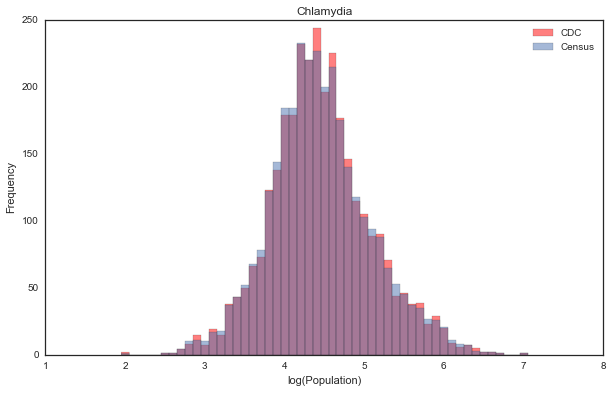

In [219]:
fig = plt.figure(figsize=(10, 6))
data = np.log10(df_completely_clean['Population'])
binwidth = 0.1
bins=np.arange(min(data), max(data) + binwidth, binwidth)

ax = data.plot.hist(bins=bins, alpha=0.5, label='CDC', color='red')
ax.set_xlabel("log(Population)")
ax.set_title("Chlamydia")

data2 = np.log10(df_census_clean["hd01s001"])
ax2 = data2.plot.hist(bins=bins, alpha=0.5, label='Census')

plt.legend()
plt.savefig('../graphics/county_population_comparison.png', bbox_inches='tight', dpi=150)

In [220]:
data = np.log10(df_completely_clean['Population'])
data2 = np.log10(df_census_clean["hd01s001"])
len(data), len(data2)

(3143, 3143)

In [221]:
true = df_completely_clean["FIPS"].isin(df_census_clean["geoid2"])
true.head(100)#.sort_values()

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
80      True
81      True
82      True
84      True
88     False
89      True
91     False
92      True
93      True
96     False
97      True
99      True
100     True
101     True
102     True
103     True
104     True
105     True
106     True
107     True
108     True
109     True
110     True
111     True
112     True
113     True
114     True
115     True
116     True
117     True
Name: FIPS, dtype: bool

In [222]:
not_in_census = set(df_completely_clean["FIPS"])-set(df_census_clean["geoid2"])
len(not_in_census)

83

Select a subset of the data for modeling:

In [223]:
df_census_subset = df_census_clean[["geoid2",
                                    "hd01s001",  #population
                                    "hd02s002",  #under 5 yrs
                                    "hd02s003",  #5-9 yrs 
                                    "hd02s004",  #10-14
                                    "hd02s005",  #15-19
                                    "hd02s006",  #20-24
                                    "hd02s007",  #25-29
                                    "hd02s008",  #30-34
                                    "hd02s009",  #35-39
                                    "hd02s010",  #40-44
                                    "hd02s011",  #45-49
                                    "hd02s012",  #50-54
                                    "hd02s013",  #55-59
                                    "hd02s014",  #60-64
                                    "hd02s015",  #65-69
                                    "hd02s016",  #70-74
                                    "hd02s017",  #75-79
                                    "hd02s018",  #80-84
                                    "hd02s019",  #85 and over
                                    "hd01s020",  #median age
                                    "hd02s026",  #male percent
                                    "hd02s051",  #female percent
                                    "hd02s078",  #white
                                    "hd02s079",  #black
                                    "hd02s080",  #native
                                    "hd02s081",  #asian
                                    "hd02s089",  #pacific
                                    "hd02s095",  #two or more
                                    "hd02s107",  #hispanic
                                    "hd02s131",  #in households
                                    "hd02s132",  #householder
                                    "hd02s133",  #spouse
                                    "hd02s134",  #child
                                    "hd02s135",  #child w own child under 18
                                    "hd02s136",  #other relatives
                                    "hd02s143",  #in group quarters
                                    "hd02s151",  #family households
                                    "hd02s152",  #family households w own child under 18
                                    "hd02s153",  #husband-wife family
                                    "hd02s154",  #husband-wife family w own child under 18
                                    "hd02s159",  #nonfamily households
                                    "hd01s167",  #average household size
                                    "hd01s168",  #average family size
                                    "hd02s181",  #owner occupied housing units
                                    "hd02s184"   #renter occupied housing units
                                   ]].copy()
df_census_subset.head()

,geoid2,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s012,hd02s013,hd02s014,hd02s015,hd02s016,hd02s017,hd02s018,hd02s019,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184
0,1001,54571,6.6,7.3,7.9,7.9,5.6,5.8,6.1,7.6,7.5,7.9,7.1,5.6,5.1,4.2,3.2,2.3,1.3,1.0,37.0,48.7,51.3,78.5,17.7,0.4,0.9,0.1,1.6,2.4,99.2,37.1,20.8,31.8,23.6,6.1,0.8,74.5,34.9,56.2,25.3,25.5,2.68,3.13,75.4,24.6
1,1003,182265,6.1,6.4,6.5,6.4,5.2,5.6,5.9,6.3,6.6,7.4,7.4,6.9,6.6,5.6,4.2,3.1,2.2,1.8,41.1,48.9,51.1,85.7,9.4,0.7,0.7,0.0,1.5,4.4,98.7,40.2,21.9,26.8,20.1,5.6,1.3,69.9,28.0,54.5,19.9,30.1,2.46,2.93,72.5,27.5
2,1005,27457,6.2,6.0,5.8,6.3,6.5,7.3,6.6,6.6,6.6,7.7,7.0,6.6,6.6,4.7,3.5,2.5,2.0,1.6,39.0,53.1,46.9,48.0,46.9,0.4,0.4,0.1,0.9,5.1,88.4,35.8,15.6,25.7,17.7,7.8,11.6,68.4,27.4,43.7,14.4,31.6,2.47,3.01,66.8,33.2
3,1007,22915,6.0,6.1,6.3,6.7,6.5,7.0,7.2,7.6,7.1,7.9,6.9,6.1,5.8,4.2,3.3,2.4,1.5,1.2,37.8,53.7,46.3,75.8,22.0,0.3,0.1,0.1,0.9,1.8,90.3,34.7,18.2,26.8,18.7,7.5,9.7,72.3,29.5,52.5,20.1,27.7,2.60,3.09,75.6,24.4
4,1009,57322,6.3,6.8,7.1,7.0,5.4,6.0,6.0,6.8,7.0,7.3,6.8,6.4,6.2,5.0,3.8,2.6,1.8,1.4,39.0,49.5,50.5,92.6,1.3,0.5,0.2,0.1,1.2,8.1,99.1,37.6,22.8,29.2,21.3,6.4,0.9,75.0,31.1,60.6,24.1,25.0,2.63,3.07,80.6,19.4


In [224]:
df_cdc = df_completely_clean[true].copy()
df_cdc_subset = df_cdc[["FIPS","Population","Cases"]]
df_cdc_subset.shape

(3060, 3)

In [225]:
df_cdc_subset.head()

,FIPS,Population,Cases
0,1001,55246,220
1,1003,195540,667
2,1005,27076,166
3,1007,22512,100
4,1009,57872,72


In [226]:
true_new = df_cdc_subset["FIPS"].isin(df_census_clean["geoid2"])
true_new.describe()

count    3060
mean        1
std         0
min      True
25%         1
50%         1
75%         1
max      True
Name: FIPS, dtype: object

## Merge the data sets into one data frame

In [227]:
df_merged = pd.merge(df_cdc_subset, df_census_subset, left_on='FIPS', right_on='geoid2', how='inner', sort=False)

In [228]:
df_merged.head()

,FIPS,Population,Cases,geoid2,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s012,hd02s013,hd02s014,hd02s015,hd02s016,hd02s017,hd02s018,hd02s019,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184
0,1001,55246,220,1001,54571,6.6,7.3,7.9,7.9,5.6,5.8,6.1,7.6,7.5,7.9,7.1,5.6,5.1,4.2,3.2,2.3,1.3,1.0,37.0,48.7,51.3,78.5,17.7,0.4,0.9,0.1,1.6,2.4,99.2,37.1,20.8,31.8,23.6,6.1,0.8,74.5,34.9,56.2,25.3,25.5,2.68,3.13,75.4,24.6
1,1003,195540,667,1003,182265,6.1,6.4,6.5,6.4,5.2,5.6,5.9,6.3,6.6,7.4,7.4,6.9,6.6,5.6,4.2,3.1,2.2,1.8,41.1,48.9,51.1,85.7,9.4,0.7,0.7,0.0,1.5,4.4,98.7,40.2,21.9,26.8,20.1,5.6,1.3,69.9,28.0,54.5,19.9,30.1,2.46,2.93,72.5,27.5
2,1005,27076,166,1005,27457,6.2,6.0,5.8,6.3,6.5,7.3,6.6,6.6,6.6,7.7,7.0,6.6,6.6,4.7,3.5,2.5,2.0,1.6,39.0,53.1,46.9,48.0,46.9,0.4,0.4,0.1,0.9,5.1,88.4,35.8,15.6,25.7,17.7,7.8,11.6,68.4,27.4,43.7,14.4,31.6,2.47,3.01,66.8,33.2
3,1007,22512,100,1007,22915,6.0,6.1,6.3,6.7,6.5,7.0,7.2,7.6,7.1,7.9,6.9,6.1,5.8,4.2,3.3,2.4,1.5,1.2,37.8,53.7,46.3,75.8,22.0,0.3,0.1,0.1,0.9,1.8,90.3,34.7,18.2,26.8,18.7,7.5,9.7,72.3,29.5,52.5,20.1,27.7,2.60,3.09,75.6,24.4
4,1009,57872,72,1009,57322,6.3,6.8,7.1,7.0,5.4,6.0,6.0,6.8,7.0,7.3,6.8,6.4,6.2,5.0,3.8,2.6,1.8,1.4,39.0,49.5,50.5,92.6,1.3,0.5,0.2,0.1,1.2,8.1,99.1,37.6,22.8,29.2,21.3,6.4,0.9,75.0,31.1,60.6,24.1,25.0,2.63,3.07,80.6,19.4


In [229]:
df_merged.shape

(3060, 49)

<Container object of 49 artists>

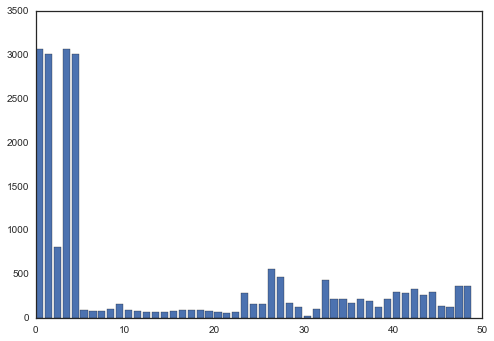

In [230]:
unique_values = [len(np.unique(df_merged.values[:,i])) for i in range(df_merged.values.shape[1])] 
plt.bar(range(df_merged.values.shape[1]), unique_values)

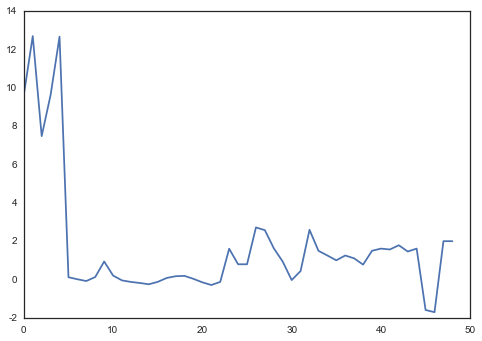

In [231]:
plt.plot(np.log(np.std(df_merged.values, axis=0)))

In [232]:
df_merged.to_csv("../data/chlamydia_cdc_census.csv")

## Model the Chlamydia rate

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


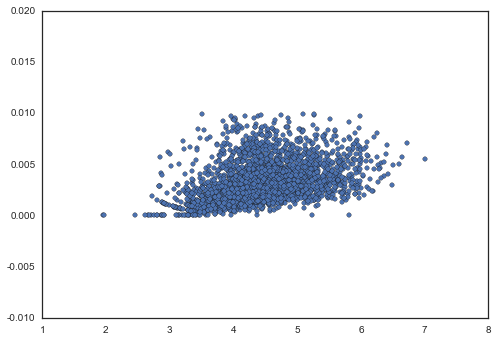

In [233]:
plt.scatter(np.log10(df_merged["Population"]), df_merged["Cases"]/df_merged["Population"])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


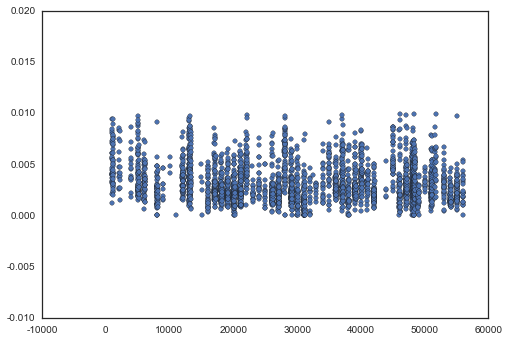

In [234]:
plt.scatter(df_merged["geoid2"], df_merged["Cases"]/df_merged["Population"])

In [235]:
from sklearn.decomposition import PCA

In [236]:
df_merged.describe()

,FIPS,Population,Cases,geoid2,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s012,hd02s013,hd02s014,hd02s015,hd02s016,hd02s017,hd02s018,hd02s019,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184
count,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000,3060.000000
mean,30492.802614,100423.684967,433.365033,30492.802614,98054.176471,6.224379,6.362124,6.576503,6.908072,5.977222,5.819314,5.695294,5.899739,6.297484,7.390719,7.611471,7.033922,6.216405,4.900654,3.786503,2.945425,2.235654,2.117320,40.491667,50.003856,49.996144,84.076340,8.121307,1.550719,1.165033,0.082418,1.966765,8.417353,96.604379,39.254118,20.403791,27.047647,20.409281,5.134248,3.395654,67.828627,27.814542,52.057712,19.173268,32.171438,2.476042,2.988451,72.576307,27.423791
std,15071.256920,323873.098080,1758.821272,15071.256920,314353.489961,1.122465,1.009624,0.920228,1.135197,2.546279,1.223101,0.950620,0.878120,0.830619,0.777696,0.880486,1.079331,1.182776,1.203571,1.030876,0.859576,0.747492,0.879869,4.959052,2.204346,2.204346,15.045667,13.038226,5.071524,2.533382,0.967483,1.549707,13.303866,4.451890,3.484761,2.711350,3.484574,3.001770,2.163983,4.451875,4.990887,4.766401,5.948292,4.289568,4.990872,0.203247,0.181387,7.350396,7.350283
min,1001.000000,90.000000,0.000000,1001.000000,82.000000,0.000000,0.000000,0.000000,0.000000,1.300000,2.300000,2.400000,1.200000,2.800000,3.300000,2.700000,1.900000,2.100000,1.200000,0.800000,0.300000,0.300000,0.000000,22.600000,43.200000,27.900000,14.200000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,45.000000,17.600000,7.500000,4.400000,0.000000,0.700000,0.000000,18.800000,0.000000,11.600000,0.000000,13.400000,1.260000,2.000000,1.400000,10.200000
25%,19006.500000,11208.000000,26.000000,19006.500000,11264.750000,5.500000,5.700000,6.000000,6.300000,4.700000,5.100000,5.100000,5.400000,5.800000,7.000000,7.100000,6.400000,5.500000,4.100000,3.100000,2.400000,1.700000,1.500000,37.700000,48.900000,49.600000,76.575000,0.500000,0.200000,0.300000,0.000000,1.100000,1.600000,96.300000,37.400000,18.800000,25.000000,18.600000,3.500000,1.100000,65.200000,25.000000,48.800000,16.500000,29.300000,2.350000,2.880000,69.200000,22.600000
50%,29188.000000,25987.000000,78.000000,29188.000000,25990.500000,6.100000,6.300000,6.600000,6.800000,5.500000,5.600000,5.600000,5.900000,6.300000,7.400000,7.600000,6.900000,6.100000,4.800000,3.700000,2.900000,2.100000,2.000000,40.500000,49.500000,50.500000,89.450000,1.900000,0.400000,0.500000,0.000000,1.600000,3.300000,98.200000,39.500000,20.700000,27.100000,20.400000,4.900000,1.800000,68.100000,27.450000,52.500000,18.700000,31.900000,2.450000,2.970000,73.800000,26.200000
75%,45085.500000,67582.250000,241.250000,45085.500000,66898.000000,6.800000,6.900000,7.100000,7.300000,6.500000,6.400000,6.200000,6.400000,6.800000,7.800000,8.100000,7.500000,6.800000,5.500000,4.300000,3.400000,2.600000,2.500000,43.400000,50.400000,51.100000,95.625000,9.400000,0.800000,1.000000,0.100000,2.300000,8.400000,98.900000,41.300000,22.225000,29.000000,22.000000,6.500000,3.700000,70.700000,30.100000,55.700000,21.000000,34.800000,2.570000,3.070000,77.400000,30.800000
max,56045.000000,10017068.000000,54881.000000,56045.000000,9818605.000000,12.600000,11.100000,12.100000,18.300000,28.100000

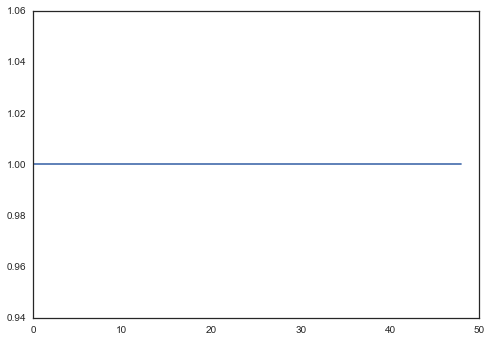

In [237]:
X = df_merged.values

columns = X.shape[1]
for column in np.arange(columns):
    mean_temp = X[:,column].mean()
    std_temp = X[:,column].std()
    X[:,column] = (X[:,column]-mean_temp)/std_temp

plt.plot((np.std(X, axis=0)))

In [238]:
pca = PCA(n_components=39)
pca.fit(X)
pca.explained_variance_ratio_

array([  3.22432752e-01,   1.62723399e-01,   8.84896895e-02,
         6.99668741e-02,   5.55007671e-02,   4.48096603e-02,
         3.97461834e-02,   3.88937978e-02,   2.68329904e-02,
         2.36452642e-02,   2.24504754e-02,   1.68886277e-02,
         1.36936455e-02,   1.27693260e-02,   8.54039342e-03,
         6.70430827e-03,   6.54846953e-03,   5.88426765e-03,
         4.73580497e-03,   3.84445087e-03,   3.60607507e-03,
         2.73657552e-03,   2.32550686e-03,   2.17336412e-03,
         1.86070442e-03,   1.78901149e-03,   1.59547924e-03,
         1.40603984e-03,   1.30800514e-03,   1.21359875e-03,
         1.13037775e-03,   9.42933494e-04,   8.07067162e-04,
         6.89373813e-04,   5.09861224e-04,   2.21792145e-04,
         1.56375442e-04,   1.50706506e-04,   1.38532254e-04])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


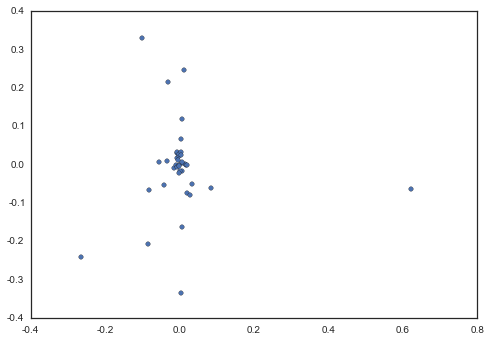

In [239]:
plt.scatter(pca.components_[:,0], pca.components_[:,1])

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


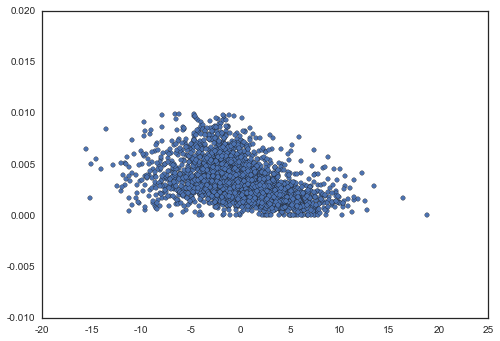

In [240]:
X_trans = pca.transform(X)
Y = df_merged["Cases"]/df_merged["Population"]
plt.scatter(X_trans[:,0],Y)

### Linear regression

In [241]:
from sklearn import linear_model

In [242]:
df_new = df_merged.drop(["FIPS","Cases","Population","geoid2"], axis=1)

Split data set into training and test data

In [243]:
cutoff = -1
X = df_new[df_merged["Cases"]>cutoff].values
Y = df_merged[df_merged["Cases"]>cutoff].Cases/df_merged[df_merged["Cases"]>cutoff].Population

ones = np.ones(round(0.75*len(X)), dtype=bool)
zeros = np.zeros(len(X)-round(0.75*len(X)), dtype=bool)
training_list = np.hstack((ones, zeros))
np.random.shuffle(training_list)
test_list = np.zeros(len(X),dtype=bool)
test_list = np.array([not i for i in training_list])

X_train = X[training_list]
X_test = X[test_list]
Y_train = Y[training_list]
Y_test = Y[test_list]

len(X), len(X_train), len(X_test)

(3060, 2295, 765)

In [244]:
weights = 1#np.sqrt(X_train[:,2]+1)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train, sample_weight=weights)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [245]:
print(regr.coef_)

[  2.53102451e-10   5.58199801e-05  -4.16317261e-05   3.13553882e-05
   1.07539052e-04   8.20472413e-05   2.25589781e-04   1.36281672e-05
   1.21287240e-04  -1.43841731e-04   2.56058957e-04   2.22087565e-04
   9.74883796e-05   9.60948652e-05   1.77289443e-04   3.34404708e-05
   3.28463681e-04   1.24302745e-04   9.42433792e-05  -1.79570361e-04
  -7.30846570e-05   7.30846570e-05   1.68957743e-05   7.41843936e-05
   5.54471538e-05   1.44575377e-05  -1.17712666e-04   1.25938390e-04
   1.11536276e-05  -5.61415107e-03   5.09361175e-05  -7.30599554e-04
  -4.93210035e-04   5.42551576e-05  -2.59121737e-04  -5.87927176e-03
  -1.15515745e-02   4.09388081e-04   2.22894238e-04  -4.12541098e-04
  -1.17865917e-02  -1.25810029e-02   1.15763746e-02   6.11359728e-03
   6.12059606e-03]


In [246]:
X_full = df_new.values
Y_full = df_merged.Cases/df_merged.Population
np.mean((regr.predict(X_full)-Y_full)**2)

1.0484271325664808e-06

/Users/akuepper/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


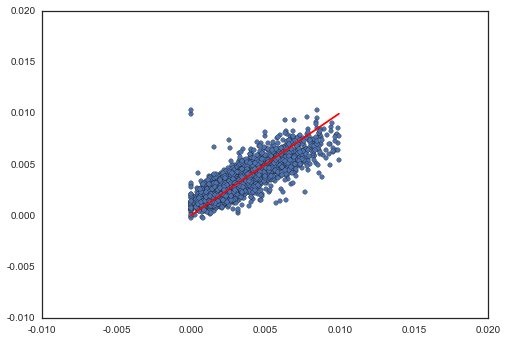

In [247]:
plt.scatter(Y_full,regr.predict(X_full))
plt.plot(np.linspace(Y_full.min(),Y_full.max(),10),np.linspace(Y_full.min(),Y_full.max(),10),color='red')

In [248]:
print('Variance score: %.5f\t(%.5f)' % (regr.score(X_test, Y_test), regr.score(X_full, Y_full)))

Variance score: 0.68524	(0.70046)


#### Some results from playing around with linear regression:

Baseline result: 0.71849 (0.70180) (no weights, full data set)

0.69579	(0.67342) (no weights, cut-off at population of 10000)

0.74215	(0.54436) (no weights, cut-off at 100 cases)

## Random forest

In [249]:
from sklearn.ensemble import RandomForestRegressor

In [250]:
clf = RandomForestRegressor(n_estimators=200, oob_score=True)
clf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [251]:
print('Variance score: %.5f\t(%.5f)' % (clf.score(X_test, Y_test), clf.score(X_full, Y_full)))

Variance score: 0.72167	(0.89413)


In [252]:
print(1-clf.oob_score_)

0.31643423403


In [253]:
print(np.vstack((np.arange(len(clf.feature_importances_)), clf.feature_importances_)).T)

[[  0.00000000e+00   1.63377940e-02]
 [  1.00000000e+00   2.29022155e-02]
 [  2.00000000e+00   8.19679169e-03]
 [  3.00000000e+00   4.26740711e-03]
 [  4.00000000e+00   1.25522751e-02]
 [  5.00000000e+00   1.25727602e-02]
 [  6.00000000e+00   9.05523486e-03]
 [  7.00000000e+00   6.35449250e-03]
 [  8.00000000e+00   6.55018806e-03]
 [  9.00000000e+00   1.16946663e-02]
 [  1.00000000e+01   1.11603093e-02]
 [  1.10000000e+01   9.14367274e-03]
 [  1.20000000e+01   8.94352639e-03]
 [  1.30000000e+01   6.56018022e-03]
 [  1.40000000e+01   4.83324773e-03]
 [  1.50000000e+01   3.72432546e-03]
 [  1.60000000e+01   3.70803312e-03]
 [  1.70000000e+01   4.07290973e-03]
 [  1.80000000e+01   5.64185472e-03]
 [  1.90000000e+01   8.25865713e-03]
 [  2.00000000e+01   1.00632549e-02]
 [  2.10000000e+01   1.08990228e-02]
 [  2.20000000e+01   3.63090559e-01]
 [  2.30000000e+01   3.23010142e-02]
 [  2.40000000e+01   8.96066952e-03]
 [  2.50000000e+01   6.12778179e-03]
 [  2.60000000e+01   3.24019071e-03]
 

                                    "hd01s001",  #population
                                    "hd02s002",  #under 5 yrs
                                    "hd02s003",  #5-9 yrs 
                                    "hd02s004",  #10-14
                                    "hd02s005",  #15-19
                                    "hd02s006",  #20-24
                                    "hd02s007",  #25-29
                                    "hd02s008",  #30-34
                                    "hd02s009",  #35-39
                                    "hd02s010",  #40-44
                                    "hd02s011",  #45-49
                                    "hd02s012",  #50-54
                                    "hd02s013",  #55-59
                                    "hd02s014",  #60-64
                                    "hd02s015",  #65-69
                                    "hd02s016",  #70-74
                                    "hd02s017",  #75-79
                                    "hd02s018",  #80-84
                                    "hd02s019",  #85 and over
                                    "hd01s020",  #median age
                                    "hd02s026",  #male percent
                                    "hd02s051",  #female percent
                                    "hd02s078",  #white
                                    "hd02s079",  #black
                                    "hd02s080",  #native
                                    "hd02s081",  #asian
                                    "hd02s089",  #pacific
                                    "hd02s095",  #two or more
                                    "hd02s107",  #hispanic
                                    "hd02s131",  #in households
                                    "hd02s132",  #householder
                                    "hd02s133",  #spouse
                                    "hd02s134",  #child
                                    "hd02s135",  #child w own child under 18
                                    "hd02s136",  #other relatives
                                    "hd02s143",  #in group quarters
                                    "hd02s151",  #family households
                                    "hd02s152",  #family households w own child under 18
                                    "hd02s153",  #husband-wife family
                                    "hd02s154",  #husband-wife family w own child under 18
                                    "hd02s159",  #nonfamily households
                                    "hd01s167",  #average household size
                                    "hd01s168",  #average family size
                                    "hd02s181",  #owner occupied housing units
                                    "hd02s184"   #renter occupied housing units

Most important features: percentage of white people and percentage of people being spouses

Save model parameters for use in web app:

In [254]:
import pickle

In [255]:
with open("../data/randomforest_params.pickle", "wb") as myfile:
    pickle.dump(clf, myfile)

In [256]:
deployed_model = pickle.load(open('../data/randomforest_params.pickle', "rb" ))

In [257]:
print('Variance score: %.5f\t(%.5f)' % (deployed_model.score(X_test, Y_test), deployed_model.score(X_full, Y_full)))

Variance score: 0.72167	(0.89413)


## Census data on ZIP code level

In [258]:
df_census_zip = pd.read_csv("../data/census/DEC_10_zipcode.csv", header=0, skiprows={1})


In [266]:
df_census_zip.head()

,geoid,geoid2,geodisplaylabel,hd01s001,hd02s001,hd01s002,hd02s002,hd01s003,hd02s003,hd01s004,hd02s004,hd01s005,hd02s005,hd01s006,hd02s006,hd01s007,hd02s007,hd01s008,hd02s008,hd01s009,hd02s009,hd01s010,hd02s010,hd01s011,hd02s011,hd01s012,hd02s012,hd01s013,hd02s013,hd01s014,hd02s014,hd01s015,hd02s015,hd01s016,hd02s016,hd01s017,hd02s017,hd01s018,hd02s018,hd01s019,hd02s019,hd01s020,hd02s020,hd01s021,hd02s021,hd01s022,hd02s022,hd01s023,hd02s023,hd01s024,hd02s024,hd01s025,hd02s025,hd01s026,hd02s026,hd01s027,hd02s027,hd01s028,hd02s028,hd01s029,hd02s029,hd01s030,hd02s030,hd01s031,hd02s031,hd01s032,hd02s032,hd01s033,hd02s033,hd01s034,hd02s034,hd01s035,hd02s035,hd01s036,hd02s036,hd01s037,hd02s037,hd01s038,hd02s038,hd01s039,hd02s039,hd01s040,hd02s040,hd01s041,hd02s041,hd01s042,hd02s042,hd01s043,hd02s043,hd01s044,hd02s044,hd01s045,hd02s045,hd01s046,hd02s046,hd01s047,hd02s047,hd01s048,hd02s048,hd01s049,...,hd01s137,hd02s137,hd01s138,hd02s138,hd01s139,hd02s139,hd01s140,hd02s140,hd01s141,hd02s141,hd01s142,hd02s142,hd01s143,hd02s143,hd01s144,hd02s144,hd01s145,hd02s145,hd01s146,hd02s146,hd01s147,hd02s147,hd01s148,hd02s148,hd01s149,hd02s149,hd01s150,hd02s150,hd01s151,hd02s151,hd01s152,hd02s152,hd01s153,hd02s153,hd01s154,hd02s154,hd01s155,hd02s155,hd01s156,hd02s156,hd01s157,hd02s157,hd01s158,hd02s158,hd01s159,hd02s159,hd01s160,hd02s160,hd01s161,hd02s161,hd01s162,hd02s162,hd01s163,hd02s163,hd01s164,hd02s164,hd01s165,hd02s165,hd01s166,hd02s166,hd01s167,hd02s167,hd01s168,hd02s168,hd01s169,hd02s169,hd01s170,hd02s170,hd01s171,hd02s171,hd01s172,hd02s172,hd01s173,hd02s173,hd01s174,hd02s174,hd01s175,hd02s175,hd01s176,hd02s176,hd01s177,hd02s177,hd01s178,hd02s178,hd01s179,hd02s179,hd01s180,hd02s180,hd01s181,hd02s181,hd01s182,hd02s182,hd01s183,hd02s183,hd01s184,hd02s184,hd01s185,hd02s185,hd01s186,hd02s186
0,8600000US00601,601,ZCTA5 00601,18570,100,1142,6.1,1245,6.7,1440,7.8,1558,8.4,1302,7,1281,6.9,1139,6.1,1043,5.6,1231,6.6,1235,6.7,1224,6.6,1204,6.5,1063,5.7,843,4.5,604,3.3,443,2.4,283,1.5,290,1.6,35.9,( X ),14436,77.7,13806,74.3,12896,69.4,3116,16.8,2463,13.3,9078,48.9,569,3.1,643,3.5,716,3.9,847,4.6,665,3.6,614,3.3,528,2.8,492,2.6,582,3.1,597,3.2,597,3.2,568,3.1,525,2.8,396,2.1,283,1.5,221,1.2,126,0.7,109,0.6,34.5,( X ),6984,37.6,6644,35.8,6163,33.2,1449,...,538,2.9,188,1,447,2.4,27,0.1,34,0.2,357,1.9,62,0.3,57,0.3,27,0.1,30,0.2,5,0,2,0,3,0,6525,100,5078,77.8,2261,34.7,3415,52.3,1465,22.5,336,5.1,171,2.6,1327,20.3,625,9.6,1447,22.2,1323,20.3,667,10.2,214,3.3,656,10.1,361,5.5,2579,39.5,1889,29,2.84,( X ),3.27,( X ),7744,100,6525,84.3,1219,15.7,222,2.9,15,0.2,36,0.5,39,0.5,312,4,595,7.7,0.8,( X ),9.4,( X ),6525,100,4392,67.3,12392,( X ),2.82,( X ),2133,32.7,6116,( X ),2.87,( X )
1,8600000US00602,602,ZCTA5 00602,41520,100,2291,5.5,2488,6,3028,7.3,3264,7.9,3007,7.2,2635,6.3,2793,6.7,2557,6.2,2965,7.1,3120,7.5,3028,7.3,2792,6.7,2368,5.7,1844,4.4,1380,3.3,986,2.4,546,1.3,428,1,37.5,( X ),33034,79.6,31696,76.3,29805,71.8,6642,16,5184,12.5,20396,49.1,1173,2.8,1271,3.1,1524,3.7,1647,4,1514,3.6,1299,3.1,1380,3.3,1286,3.1,1413,3.4,1497,3.6,1447,3.5,1370,3.3,1138,2.7,913,2.2,669,1.6,422,1,246,0.6,187,0.5,36.6,( X ),16079,38.7,15402,37.1,14441,34.8,3125,...,1128,2.7,341,0.8,853,2.1,38,0.1,63,0.2,669,1.6,71,0.2,12,0,12,0,0,0,59,0.1,31,0.1,28,0.1,15002,100,11646,77.6,4906,32.7,8272,55.1,3397,22.6,766,5.1,311,2.1,2608,17.4,1198,8,3356,22.4,3071,20.5,1573,10.5,453,3,1498,10,733,4.9,5635,37.6,3891,25.9,2.76,( X ),3.20,( X ),18073,100,15002,83,3071,17,466,2.6,43,0.2,230,1.3,80,0.4,799,4.4,1453,8,1.9,( X ),12,( X ),15002,100,11620,77.5,32580,( X ),2.80,( X ),3382,22.5,8869,( X ),2.62,( X )
2,8600000US00603,603,ZCTA5 00603,54689,100,3245,5.9,3439,6.3,3810,7,3961,7.2,3584,6.6,3510,6.4,3566,6.5,3529,6.5,3444,6.3,3475,6.4,3524,6.4,3372,6.2,3619,6.6,2947,5.4,2228,4.1,1588,2.9,1010,1.8,838,1.5,38.2,( X ),43440,79.4,41785,76.4,39461,72.2,10832,19.8,8611,15.7,26597,48.6,1648,3,1850,3.4,1965,3.6,2004,3.7,1792,3.3,1769,3.2,1735,3.2,1747,3.2,1647,3,1655,3,1596,2.9,1609,2.9,1696,3.1,

In [260]:
df_census_zip.convert_objects(convert_numeric=True)
df_census_zip.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


GEO.id                object
GEO.id2                int64
GEO.display-label     object
HD01_S001              int64
HD02_S001             object
HD01_S002              int64
HD02_S002             object
HD01_S003              int64
HD02_S003             object
HD01_S004              int64
HD02_S004             object
HD01_S005              int64
HD02_S005             object
HD01_S006              int64
HD02_S006             object
HD01_S007              int64
HD02_S007             object
HD01_S008              int64
HD02_S008             object
HD01_S009              int64
HD02_S009             object
HD01_S010              int64
HD02_S010             object
HD01_S011              int64
HD02_S011             object
HD01_S012              int64
HD02_S012             object
HD01_S013              int64
HD02_S013             object
HD01_S014              int64
                      ...   
HD01_S172              int64
HD02_S172             object
HD01_S173              int64
HD02_S173     

In [261]:
columnnames = list(df_census_zip.columns.values)

for columnname in columnnames:
    columnname_wo_specialcharacters = re.sub('[ \-\_\+\=\`\~\{\}\;\:\,\.\<\>\?\/\!\@\#\$\%\^\&\*\(\)\[\]]', '', columnname)
    print(columnname_wo_specialcharacters.lower())
    df_census_zip.rename(columns={columnname: columnname_wo_specialcharacters.lower()}, inplace=True)


geoid
geoid2
geodisplaylabel
hd01s001
hd02s001
hd01s002
hd02s002
hd01s003
hd02s003
hd01s004
hd02s004
hd01s005
hd02s005
hd01s006
hd02s006
hd01s007
hd02s007
hd01s008
hd02s008
hd01s009
hd02s009
hd01s010
hd02s010
hd01s011
hd02s011
hd01s012
hd02s012
hd01s013
hd02s013
hd01s014
hd02s014
hd01s015
hd02s015
hd01s016
hd02s016
hd01s017
hd02s017
hd01s018
hd02s018
hd01s019
hd02s019
hd01s020
hd02s020
hd01s021
hd02s021
hd01s022
hd02s022
hd01s023
hd02s023
hd01s024
hd02s024
hd01s025
hd02s025
hd01s026
hd02s026
hd01s027
hd02s027
hd01s028
hd02s028
hd01s029
hd02s029
hd01s030
hd02s030
hd01s031
hd02s031
hd01s032
hd02s032
hd01s033
hd02s033
hd01s034
hd02s034
hd01s035
hd02s035
hd01s036
hd02s036
hd01s037
hd02s037
hd01s038
hd02s038
hd01s039
hd02s039
hd01s040
hd02s040
hd01s041
hd02s041
hd01s042
hd02s042
hd01s043
hd02s043
hd01s044
hd02s044
hd01s045
hd02s045
hd01s046
hd02s046
hd01s047
hd02s047
hd01s048
hd02s048
hd01s049
hd02s049
hd01s050
hd02s050
hd01s051
hd02s051
hd01s052
hd02s052
hd01s053
hd02s053
hd01s054
hd02s054

In [262]:
df_census_zip_clean = df_census_zip.replace(to_replace='\(r.+\)', value="", regex=True).convert_objects(convert_numeric=True)
df_census_zip_clean.dtypes

/Users/akuepper/anaconda/lib/python3.5/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x
/Users/akuepper/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


geoid               object
geoid2               int64
geodisplaylabel     object
hd01s001             int64
hd02s001           float64
hd01s002             int64
hd02s002           float64
hd01s003             int64
hd02s003           float64
hd01s004             int64
hd02s004           float64
hd01s005             int64
hd02s005           float64
hd01s006             int64
hd02s006           float64
hd01s007             int64
hd02s007           float64
hd01s008             int64
hd02s008           float64
hd01s009             int64
hd02s009           float64
hd01s010             int64
hd02s010           float64
hd01s011             int64
hd02s011           float64
hd01s012             int64
hd02s012           float64
hd01s013             int64
hd02s013           float64
hd01s014             int64
                    ...   
hd01s172             int64
hd02s172           float64
hd01s173             int64
hd02s173           float64
hd01s174             int64
hd02s174           float64
h

In [263]:
df_census_zip_clean.describe()

,geoid2,hd01s001,hd02s001,hd01s002,hd02s002,hd01s003,hd02s003,hd01s004,hd02s004,hd01s005,hd02s005,hd01s006,hd02s006,hd01s007,hd02s007,hd01s008,hd02s008,hd01s009,hd02s009,hd01s010,hd02s010,hd01s011,hd02s011,hd01s012,hd02s012,hd01s013,hd02s013,hd01s014,hd02s014,hd01s015,hd02s015,hd01s016,hd02s016,hd01s017,hd02s017,hd01s018,hd02s018,hd01s019,hd02s019,hd01s020,hd01s021,hd02s021,hd01s022,hd02s022,hd01s023,hd02s023,hd01s024,hd02s024,hd01s025,hd02s025,hd01s026,hd02s026,hd01s027,hd02s027,hd01s028,hd02s028,hd01s029,hd02s029,hd01s030,hd02s030,hd01s031,hd02s031,hd01s032,hd02s032,hd01s033,hd02s033,hd01s034,hd02s034,hd01s035,hd02s035,hd01s036,hd02s036,hd01s037,hd02s037,hd01s038,hd02s038,hd01s039,hd02s039,hd01s040,hd02s040,hd01s041,hd02s041,hd01s042,hd02s042,hd01s043,hd02s043,hd01s044,hd02s044,hd01s045,hd01s046,hd02s046,hd01s047,hd02s047,hd01s048,hd02s048,hd01s049,hd02s049,hd01s050,hd02s050,hd01s051,...,hd01s133,hd02s133,hd01s134,hd02s134,hd01s135,hd02s135,hd01s136,hd02s136,hd01s137,hd02s137,hd01s138,hd02s138,hd01s139,hd02s139,hd01s140,hd02s140,hd01s141,hd02s141,hd01s142,hd02s142,hd01s143,hd02s143,hd01s144,hd02s144,hd01s145,hd02s145,hd01s146,hd02s146,hd01s147,hd02s147,hd01s148,hd02s148,hd01s149,hd02s149,hd01s150,hd02s150,hd01s151,hd02s151,hd01s152,hd02s152,hd01s153,hd02s153,hd01s154,hd02s154,hd01s155,hd02s155,hd01s156,hd02s156,hd01s157,hd02s157,hd01s158,hd02s158,hd01s159,hd02s159,hd01s160,hd02s160,hd01s161,hd02s161,hd01s162,hd02s162,hd01s163,hd02s163,hd01s164,hd02s164,hd01s165,hd02s165,hd01s166,hd02s166,hd01s167,hd01s168,hd01s169,hd02s169,hd01s170,hd02s170,hd01s171,hd02s171,hd01s172,hd02s172,hd01s173,hd02s173,hd01s174,hd02s174,hd01s175,hd02s175,hd01s176,hd02s176,hd01s177,hd02s177,hd01s178,hd01s179,hd01s180,hd02s180,hd01s181,hd02s181,hd01s182,hd01s183,hd01s184,hd02s184,hd01s185,hd01s186
count,33120.000000,33120.000000,32976,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,...,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32976.000000,33120.000000,32803,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,32803.000000,33120.000000,3312

In [264]:
df_census_zip_subset = df_census_zip[["geoid2",
                                    "hd01s001",  #population
                                    "hd02s002",  #under 5 yrs
                                    "hd02s003",  #5-9 yrs 
                                    "hd02s004",  #10-14
                                    "hd02s005",  #15-19
                                    "hd02s006",  #20-24
                                    "hd02s007",  #25-29
                                    "hd02s008",  #30-34
                                    "hd02s009",  #35-39
                                    "hd02s010",  #40-44
                                    "hd02s011",  #45-49
                                    "hd02s012",  #50-54
                                    "hd02s013",  #55-59
                                    "hd02s014",  #60-64
                                    "hd02s015",  #65-69
                                    "hd02s016",  #70-74
                                    "hd02s017",  #75-79
                                    "hd02s018",  #80-84
                                    "hd02s019",  #85 and over
                                    "hd01s020",  #median age
                                    "hd02s026",  #male percent
                                    "hd02s051",  #female percent
                                    "hd02s078",  #white
                                    "hd02s079",  #black
                                    "hd02s080",  #native
                                    "hd02s081",  #asian
                                    "hd02s089",  #pacific
                                    "hd02s095",  #two or more
                                    "hd02s107",  #hispanic
                                    "hd02s131",  #in households
                                    "hd02s132",  #householder
                                    "hd02s133",  #spouse
                                    "hd02s134",  #child
                                    "hd02s135",  #child w own child under 18
                                    "hd02s136",  #other relatives
                                    "hd02s143",  #in group quarters
                                    "hd02s151",  #family households
                                    "hd02s152",  #family households w own child under 18
                                    "hd02s153",  #husband-wife family
                                    "hd02s154",  #husband-wife family w own child under 18
                                    "hd02s159",  #nonfamily households
                                    "hd01s167",  #average household size
                                    "hd01s168",  #average family size
                                    "hd02s181",  #owner occupied housing units
                                    "hd02s184"   #renter occupied housing units
                                   ]].copy()
df_census_zip_subset.head()

,geoid2,hd01s001,hd02s002,hd02s003,hd02s004,hd02s005,hd02s006,hd02s007,hd02s008,hd02s009,hd02s010,hd02s011,hd02s012,hd02s013,hd02s014,hd02s015,hd02s016,hd02s017,hd02s018,hd02s019,hd01s020,hd02s026,hd02s051,hd02s078,hd02s079,hd02s080,hd02s081,hd02s089,hd02s095,hd02s107,hd02s131,hd02s132,hd02s133,hd02s134,hd02s135,hd02s136,hd02s143,hd02s151,hd02s152,hd02s153,hd02s154,hd02s159,hd01s167,hd01s168,hd02s181,hd02s184
0,601,18570,6.1,6.7,7.8,8.4,7,6.9,6.1,5.6,6.6,6.7,6.6,6.5,5.7,4.5,3.3,2.4,1.5,1.6,35.9,48.9,51.1,93.1,3.1,0.4,0,0,1.3,99.5,99.7,35.1,18.4,37.5,22.5,6.2,0.3,77.8,34.7,52.3,22.5,22.2,2.84,3.27,67.3,32.7
1,602,41520,5.5,6,7.3,7.9,7.2,6.3,6.7,6.2,7.1,7.5,7.3,6.7,5.7,4.4,3.3,2.4,1.3,1,37.5,49.1,50.9,86.7,5.3,0.3,0.1,0,2.4,99.4,99.8,36.1,19.9,35.6,20.8,6.1,0.2,77.6,32.7,55.1,22.6,22.4,2.76,3.20,77.5,22.5
2,603,54689,5.9,6.3,7,7.2,6.6,6.4,6.5,6.5,6.3,6.4,6.4,6.2,6.6,5.4,4.1,2.9,1.8,1.5,38.2,48.6,51.4,82.9,7.6,0.3,0.2,0,2.5,98.5,97.9,38.7,17.2,32.9,20.6,6.6,2.1,71.1,29.8,44.4,17.1,28.9,2.53,3.06,64.9,35.1
3,606,6615,6.6,6.2,7.4,7.7,7.8,6.9,6.1,6,6.4,6.7,6.9,6.5,6,4.5,3.1,2.4,1.3,1.6,36.2,49.4,50.6,88.9,4.7,0.4,0,0.1,1.5,99.4,99.8,36.3,18.2,34.9,21.3,7.7,0.2,74.6,31.6,50,20.8,25.4,2.75,3.24,72.3,27.7
4,610,29016,5.7,6.1,7.6,7.5,6.4,6.2,6.7,6.7,7.1,6.8,6.6,6,6.2,5,4.1,2.6,1.5,1.3,38.1,48.6,51.4,82,7.2,0.3,0.1,0,2.8,99.2,99.6,37.3,18.5,33.8,20.7,7.2,0.4,74.4,31.2,49.6,19.9,25.6,2.67,3.14,77.5,22.5


In [267]:
df_census_zip_subset.shape

(33120, 46)

In [268]:
df_census_zip_subset.to_csv("../data/census_zipcode.csv")